In [1]:
from robustness_dataset import RobustnessDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

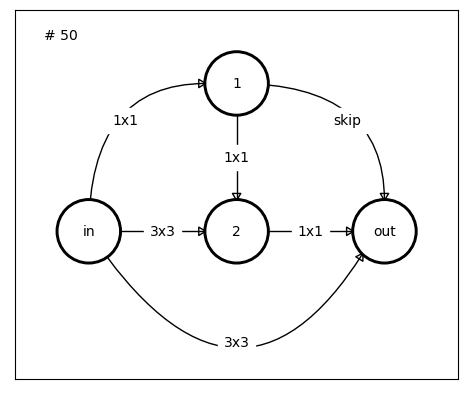

In [2]:
data = RobustnessDataset(path="robustness-data")
data.draw_arch(i=50)

In [3]:
data.id_to_string(50)

'|nor_conv_1x1~0|+|nor_conv_3x3~0|nor_conv_1x1~1|+|nor_conv_3x3~0|skip_connect~1|nor_conv_1x1~2|'

In [4]:
len(data.non_isomorph_ids)

6466

In [5]:
try:
    import tqdm.notebook as tqdm
except:
    tqdm = None
result = data.query(
    tqdm = tqdm,
    measure = "accuracy",
)

  0%|          | 0/60 [00:00<?, ?it/s]

In [6]:
result["cifar10"]["clean"]["accuracy"][data.get_uid(13433)]

0.893

In [7]:
result["cifar10"]["pgd@Linf"]["accuracy"][data.get_uid(13433)][data.meta["epsilons"]["pgd@Linf"].index(1.0)]

0.336

# Mean Accuracies

In [8]:
acc = {d:{} for d in result.keys()}
for d in acc.keys():
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in result[d]:
            acc[d][attack] = [[result[d]["clean"]["accuracy"][idx]] + r for idx, r in result[d][attack]["accuracy"].items()]

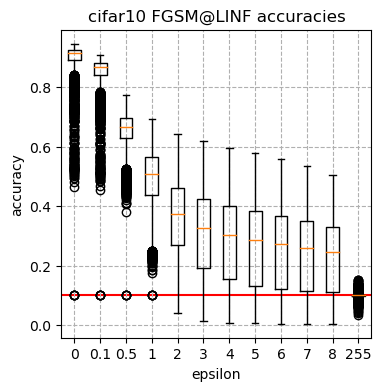

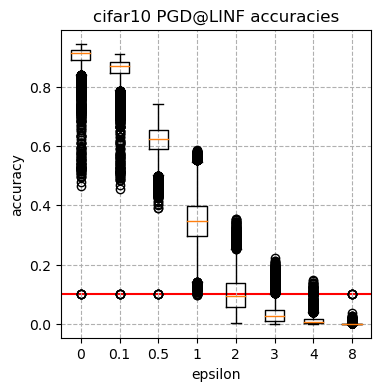

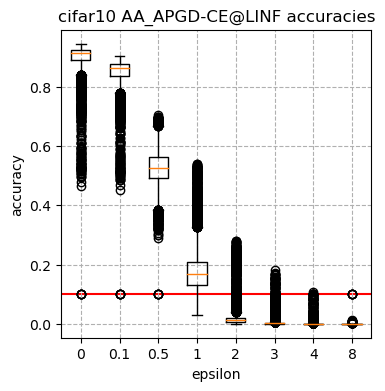

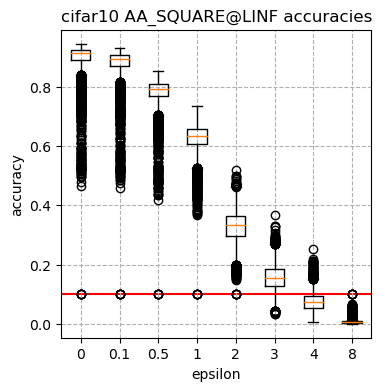

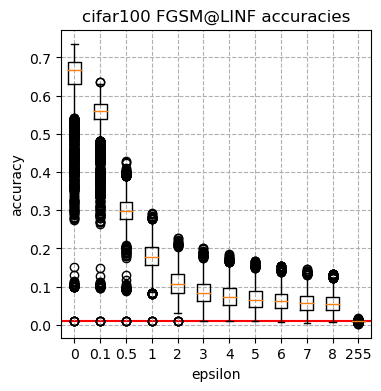

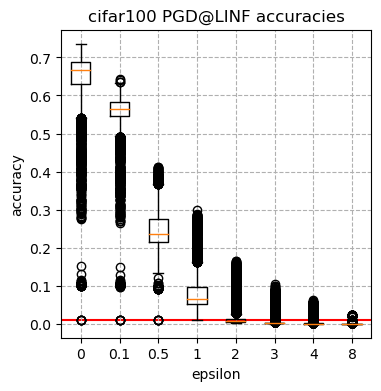

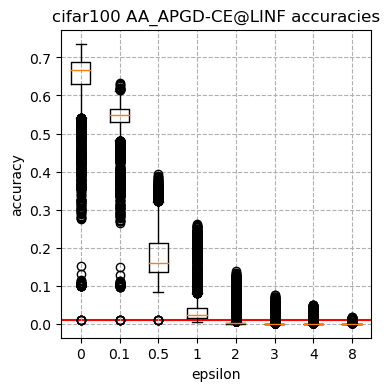

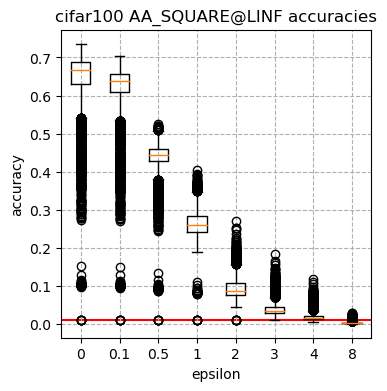

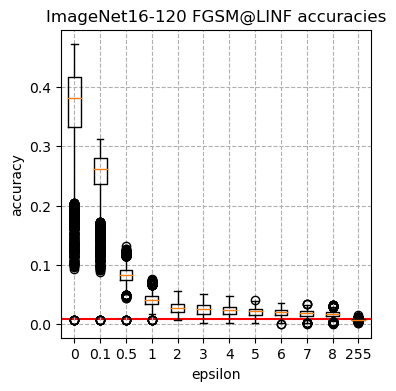

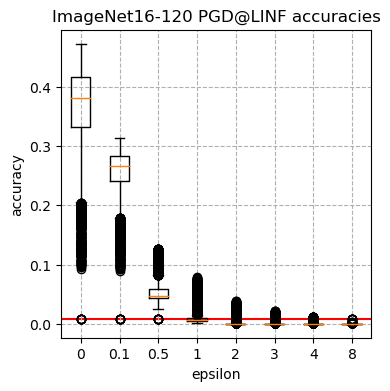

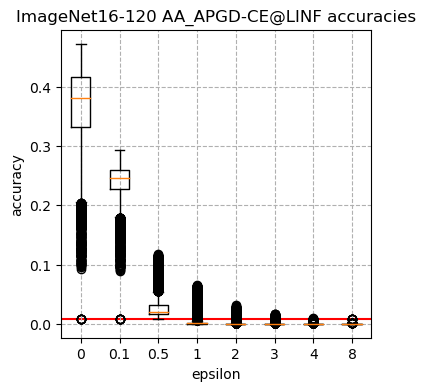

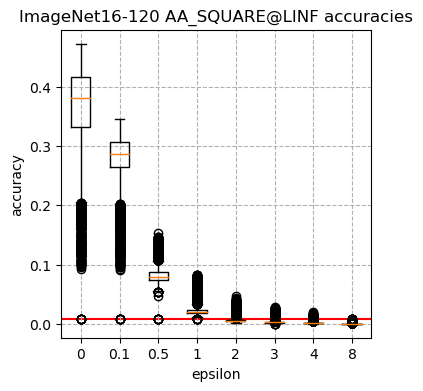

In [9]:
for d in acc.keys():
    for attack in ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]:
        if attack in acc[d]:
            plt.figure(figsize=(4,4))
            plt.grid(linestyle="--")
            plt.boxplot(np.array(acc[d][attack]))
            eps = data.meta["epsilons"][attack]
            eps = [0] + [int(e) if int(e)==e else e for e in eps]
            plt.xticks(range(1,len(eps)+1), labels=eps)
            plt.xlabel("epsilon")
            plt.ylabel("accuracy")
            plt.title(f"{d} {str(attack).upper()} accuracies")
            classes = 10 if d == "cifar10" else 100 if d == "cifar100" else 120
            plt.plot([.5,len(eps)+.5],[1/classes,1/classes], color="red", alpha=1, zorder=-1)
            plt.xlim(.5,len(eps)+.5)
            plt.show()